In [41]:
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, confusion_matrix,f1_score
import matplotlib.pyplot as plt
from sklearn import linear_model
#from sklearn.metrics import classification_report,accuracy_score  
import numpy as np
#from sklearn.ensemble import RandomForestClassifier
import warnings
import collections
#from sklearn.metrics import roc_curve, auc
#from sklearn.neural_network import MLPClassifier
import itertools
from sklearn.model_selection import cross_val_score#k折交叉验证

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,mean_absolute_percentage_error 
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold

warnings.filterwarnings("ignore")
plt.rcParams["font.sans-serif"]=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [42]:
df=pd.read_excel(r'./随机森林实验/随机森林/构建模型数据.xlsx')#构建模型的数据
#df=pd.read_excel(r'D:\cat\科研\期刊论文\初稿\随机森林\RF_Model\合并排序数据.xlsx')#构建模型的数据

df1=pd.read_excel(r'./随机森林实验/随机森林/评价实验数据.xlsx')#评价试验的数据

In [43]:
x=df.drop('Salience',axis=1)
#x=df.drop(['Salience','Text'],axis=1)
y=df['Salience']
x1=df1.drop('Salience',axis=1)
y1=df1['Salience']
print(x.shape[1]) # 显示x的特征数量
print(x1.shape[1]) # 显示x1的特征数量
print(set(x.columns) - set(x1.columns))
print(set(x1.columns) - set(x.columns))
# 删除未命名的列
if 'Unnamed: 11' in x.columns:
    x = x.drop(columns=['Unnamed: 11'])
x_train, x_test ,y_train, y_test= train_test_split(x, y,test_size=0.1,shuffle=False)
s=StandardScaler() #标准化后的数据
x_train=s.fit_transform(x_train)
x_test=s.transform(x_test)
x1=s.transform(x1)

print(y_test)

11
10
{'Unnamed: 11'}
set()
45    71.73913
46    48.00000
47    29.00000
48    18.00000
49     7.00000
Name: Salience, dtype: float64


In [44]:
#绘制真实值与预测值之间的散点图
def scatter_plot(TureValues,PredictValues,R2):
    #设置参考的1：1虚线参数
    xxx = [-0.5,80]
    yyy = [-0.5,80]
    #绘图
    plt.figure()
    plt.plot(xxx , yyy , c='0' , linewidth=1 , linestyle=':' , marker='.' , alpha=0.3)#绘制虚线
    plt.scatter(TureValues , PredictValues , s=20 , c='r' , edgecolors='k' , marker='o' , alpha=0.8)#绘制散点图，横轴是真实值，竖轴是预测值
    plt.xlim((0,80))   #设置坐标轴范围
    plt.ylim((0,80))
 #   plt.title('R2:%.2f'%R2)
    plt.xlabel('POI显著度真实值') # x 轴
    plt.ylabel('POI显著度预测值') # y轴
    plt.show() 

26.271821886158378 5
best estimator:  5


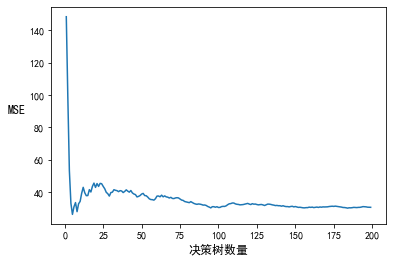

In [45]:
#在其他参数默认的情况下，观察n_estimators对结果的影响。
scorel = []
#metric = 'neg_mean_squared_log_error'
for i in range(1,200,1):
    rfr =RandomForestRegressor(n_estimators=i,max_features=3,
                                 min_samples_split=2,oob_score=True,random_state=25)
    # score = cross_val_score(rfr,x_train,y_train,cv=10,scoring=metric).mean()
    rfr = rfr.fit(x_train,y_train)
    pred_i = rfr.predict(x_train)
    score = mean_squared_error(pred_i, y_train)#
    scorel.append(score)
print(min(scorel),list(range(1,200,1))[scorel.index(min(scorel))])
print('best estimator: ', list(range(1,200,1))[scorel.index(min(scorel))])
best_estimators=list(range(1,200,1))[scorel.index(min(scorel))]
#plt.figure(figsize=[20,5])
plt.plot(range(1,200,1),scorel)
plt.xlabel('决策树数量',fontsize='large') #x 轴
plt.ylabel('MSE',fontsize='large',rotation = 'horizontal',horizontalalignment='right') # y轴
plt.show()

19.261040957781987 4


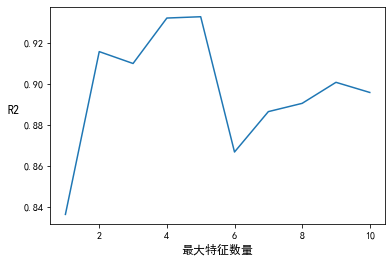

In [46]:
#在其他参数默认的情况下，观察max_featrues对结果的影响。
dict1={'max_featrues':[]}
data=[]
scorel = []
my_mse=[]
for i in range(1,11,1):
    dict1={'max_featrues':i}
    rfr =RandomForestRegressor(n_estimators=5,max_features=i,
                                 min_samples_split=2,oob_score=True,random_state=25)
    # score = cross_val_score(rfr,x_train,y_train,cv=10,scoring=metric).mean()
    rfr = rfr.fit(x_train,y_train)
    pred_i = rfr.predict(x_train)
    score = r2_score(pred_i, y_train)    
    #print (score,i) 
    dict1['R2'] = score
    scorel.append(score)
    my_mse.append( mean_squared_error(pred_i, y_train))
    dict1['MSE'] = mean_squared_error(pred_i, y_train)
    dict1['MAE'] = mean_absolute_error(pred_i, y_train)
    data.append(dict1)
  
print(np.min(my_mse),range(1,11,1)[my_mse.index(min(my_mse))])
#best_estimators=list(range(1,11,1))[scorel.index(min(scorel))]
data=pd.DataFrame(data)
data.to_excel('./TEST.xlsx',sheet_name='HYS')
plt.plot(range(1,11,1),scorel)
plt.xlabel('最大特征数量',fontsize='large') #x 轴
plt.ylabel('R2',fontsize='large',rotation = 'horizontal',horizontalalignment='right') # y轴
plt.show()

0.8815710163527412
mae_score 3.647278582930756
mse_score 42.93708978039162


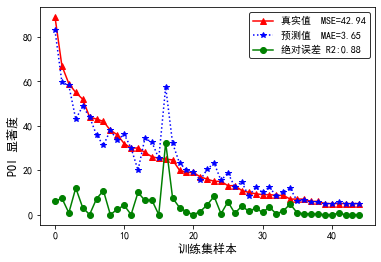

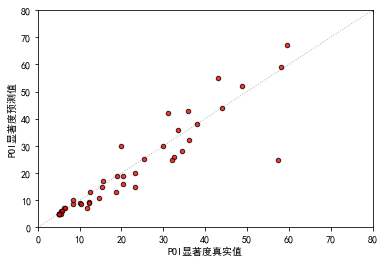

In [58]:
#确定模型结构训练集上的效果，即绘制训练过程。
RFR1=RandomForestRegressor(n_estimators=5,max_features=6,
                                 min_samples_split=2,oob_score=True,
                                 random_state=25)  
RFR1 = RFR1.fit(x_train,y_train)
#绘制Train的结果图
pred_f1 =RFR1.predict(x_train)
r2_f1=r2_score(y_train,pred_f1)
print(r2_f1) 
mae = mean_absolute_error(pred_f1, y_train)
mse = mean_squared_error(pred_f1, y_train)
print('mae_score',mae)
print('mse_score',mse)
plt.plot(range(len(y_train)),y_train,'r^-',label='真实值  MSE=%.2f'%mse) 
plt.plot(range(len(y_train)),pred_f1,'b*',ls = 'dotted',label='预测值  MAE=%.2f'%mae) 
plt.plot(range(len(y_train)),abs(y_train-pred_f1),'go-',label='绝对误差 R2:%.2f'%r2_f1)#绘制绝对值的线
plt.legend(loc='best',edgecolor='black')
#plt.title('RF模型训练集预测')
plt.xlabel('训练集样本',fontsize='large') # x 轴
plt.ylabel('POI 显著度',fontsize='large',horizontalalignment='right') # y轴
scatter_plot(pred_f1, y_train,r2_f1)

In [59]:
#利用网格搜索交叉验证法优化模型，输出最有参数组合
start=time.time()
parms_grid={
    'n_estimators':[3,4,5,6,7],
    #'max_depth':[2,3,4,5,6,7],
    'max_features':[3,4,5,6],
    'min_samples_split':[1,2,3]    
}

Kfold=KFold(n_splits=10) # 创建十折交叉验证对象
rf =RandomForestRegressor(oob_score=True,  random_state=25   )

model = GridSearchCV(rf,parms_grid,n_jobs=-1, verbose=2, cv=Kfold,scoring='r2')  
model.fit(x_train, y_train)
end=time.time()
print('程序运行时间：%.2f分' %((end - start)/60))

means=model.cv_results_['mean_test_score']
params=model.cv_results_['params']

for i in range(len(means)):
    print('训练过程分数及参数：',means[i],params[i])

print('\n最好的分数以及参数：',model.best_score_,model.best_params_)

pred_1 =model.predict(x_test)
print(r2_score(y_test,pred_1))

model.best_estimator_

UnicodeEncodeError: 'ascii' codec can't encode characters in position 18-21: ordinal not in range(128)

0.9468742405159454
mae_score 2.664154589371981
mse_score 19.261040957781987


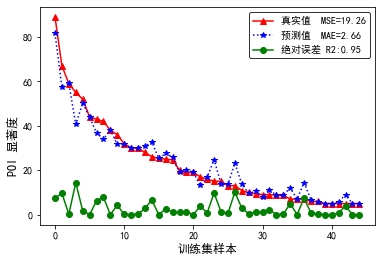

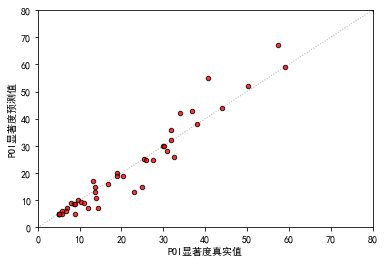

In [213]:
#优化模型的训练结果
RFR2=RandomForestRegressor(n_estimators=5,max_features=4,
                                 min_samples_split=2,oob_score=True,
                                 random_state=25)
RFR2 = RFR2.fit(x_train,y_train)
#绘制Train的结果图
pred_f2 =RFR2.predict(x_train)
r2_f2=r2_score(y_train,pred_f2)
print(r2_f2) 
mae2 = mean_absolute_error(pred_f2, y_train)
mse2 = mean_squared_error(pred_f2, y_train)
print('mae_score',mae2)
print('mse_score',mse2)
plt.plot(range(len(y_train)),y_train,'r^-',label='真实值  MSE=%.2f'%mse2) 
plt.plot(range(len(y_train)),pred_f2,'b*',ls = 'dotted',label='预测值  MAE=%.2f'%mae2) 
plt.plot(range(len(y_train)),abs(y_train-pred_f2),'go-',label='绝对误差 R2:%.2f'%r2_f2)#绘制绝对值的线
plt.legend(loc='best',edgecolor='black')
#plt.title('GSCV-RF模型训练集预测')
plt.xlabel('训练集样本',fontsize='large') # x 轴
plt.ylabel('POI 显著度',fontsize='large',horizontalalignment='right') # y轴
scatter_plot(pred_f2, y_train,r2_f2)

0.4481725367298035
0.879708208693758
mae_score 13.58927536231884
mse_score 289.9793442554086


Text(0, 0.5, 'POI 显著度')

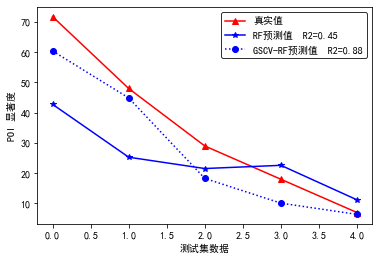

In [214]:
#优化模型的预测结果
#RF模型
RFR3=RandomForestRegressor(n_estimators=10,max_features=3,
                                 min_samples_split=2,oob_score=True,
                                 random_state=25)  #25
RFR3 = RFR3.fit(x_train,y_train)
#GSCV-RF模型
RFR4=RandomForestRegressor(n_estimators=5,max_features=4,
                                 min_samples_split=2,oob_score=True,
                                 random_state=25)
RFR4 = RFR4.fit(x_train,y_train)
pred_f = RFR3.predict(x_test)
pred_i = RFR4.predict(x_test)
print(r2_score(y_test,pred_f))
print(r2_score(y_test,pred_i))
mae = mean_absolute_error(pred_f, y_test)
mse = mean_squared_error(pred_f, y_test)
print('mae_score',mae)
print('mse_score',mse)
plt.plot(range(len(y_test)),y_test,'r^-',label='真实值')
plt.plot(range(len(y_test)),pred_f,'b*-',label='RF预测值  R2=%.2f'%r2_score(y_test,pred_f)) 
plt.plot(range(len(y_test)),pred_i,'bo',ls = 'dotted',label='GSCV-RF预测值  R2=%.2f'%r2_score(y_test,pred_i)) 
plt.legend(loc='best',edgecolor='black')
#plt.title('模型优化对比')
plt.xlabel('测试集数据') # x 轴
plt.ylabel('POI 显著度') # y轴

['FaceArea', 'Color', 'Intensity', 'Familarity', 'Function', 'Name', 'Intersection', 'Elevator', 'Entrance', 'Corner']
[('FaceArea', 0.19302422), ('Color', 0.07636313), ('Intensity', 0.11881719), ('Familarity', 0.27530853), ('Function', 0.00067986), ('Name', 0.02177179), ('Intersection', 0.12433834), ('Elevator', 0.02637144), ('Entrance', 0.07274199), ('Corner', 0.09058351)]
[('Function', 0.00067986), ('Name', 0.02177179), ('Elevator', 0.02637144), ('Entrance', 0.07274199), ('Color', 0.07636313), ('Corner', 0.09058351), ('Intensity', 0.11881719), ('Intersection', 0.12433834), ('FaceArea', 0.19302422), ('Familarity', 0.27530853)]
[0.00067986, 0.02177179, 0.02637144, 0.07274199, 0.07636313, 0.09058351, 0.11881719, 0.12433834, 0.19302422, 0.27530853]
['Function', 'Name', 'Elevator', 'Entrance', 'Color', 'Corner', 'Intensity', 'Intersection', 'FaceArea', 'Familarity']


Text(0.5, 0, '权重值')

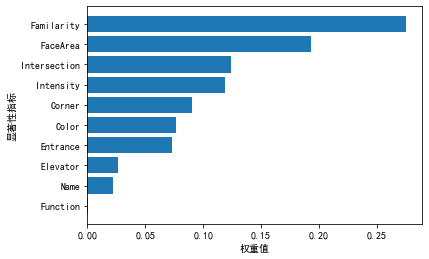

In [62]:
#计算自变量的重要性
ALL_Index_Importances=list(RFR4.feature_importances_)
x_train_column_name=list(x.columns)
print(x_train_column_name)

Index_importance=[(index,round(importance,8))
                  for index ,importance in zip(x_train_column_name,ALL_Index_Importances)]
print(Index_importance)

Sorted_Index_importance=sorted(Index_importance,key=lambda x:x[1])
print(Sorted_Index_importance)
importance_values=[row[1] for row in Sorted_Index_importance ]
print(importance_values)
sorted_Index=[row[0] for row in Sorted_Index_importance ]
print(sorted_Index)

plt.figure(1)
#plt.clf #清除图像

importance_plot_x_values=list(range(len(Sorted_Index_importance)))
plt.barh(importance_plot_x_values,importance_values)
plt.yticks(importance_plot_x_values,sorted_Index)
plt.ylabel('显著性指标')
plt.xlabel('权重值') 